### 1. Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### 2.Create the dataframe

In [2]:
df = pd.read_csv('Zomato.csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### 3.Data Cleaning

In [3]:
# convert the data types of column 'rate'
def handle_rate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handle_rate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [6]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


#### 1.What types of restaurant do the majority of customers order from ?

Text(0.5, 0, 'Types of Resturant')

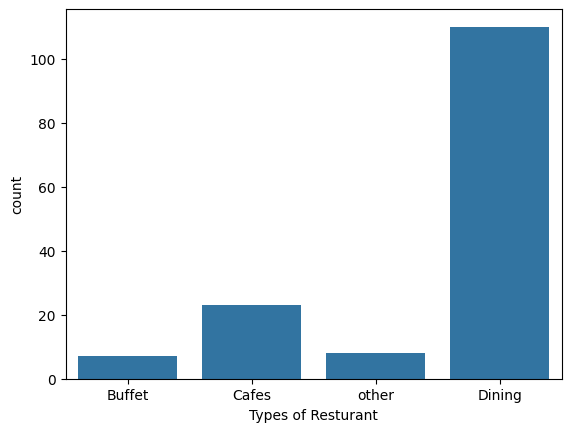

In [7]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Types of Resturant")

Analysis Result :- Majority of the restayrants falls in dinnig category

#### 2.How many votes has each types of restaurant received from customers ?

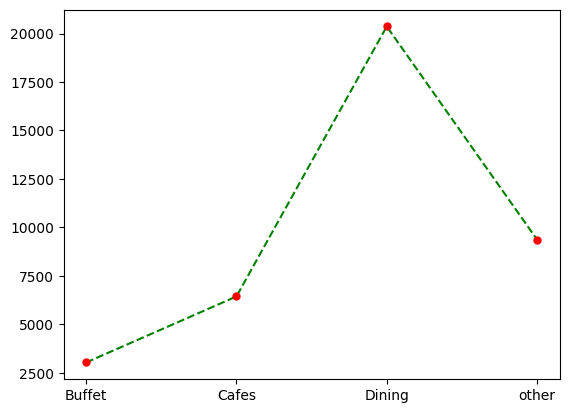

In [8]:
gb = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':gb})
plt.plot(result,'o--g',ms = 5,mfc = 'r',mec = 'r')
plt.show()

#### 3. What are the rating that the majority of restaurants have receives ?

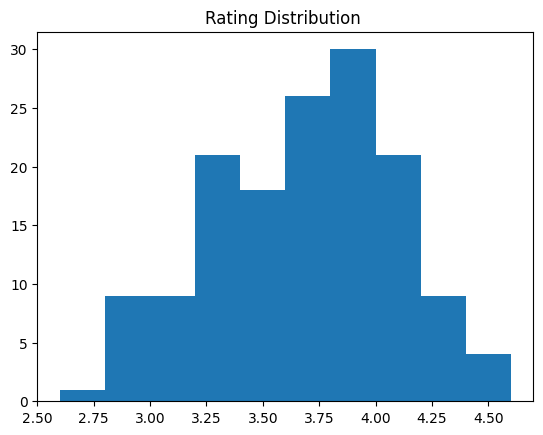

In [9]:
plt.hist(df['rate'],bins=10)
plt.title("Rating Distribution ")
plt.show()

Analysis result :- Majority of the restaurants received rating from 3.75 to 4

#### 4. What is the average spending of orders by the couple on online ? 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

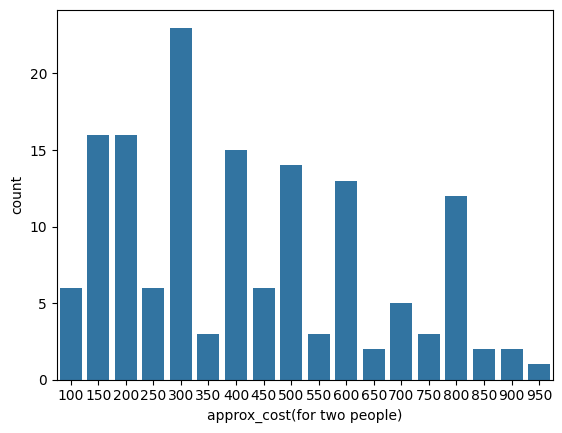

In [10]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x = couple_data)

Result Analysis :- the majority of couple prefer restaurants with an approximate cost of Rs.300 

#### 5.Which mode has received maximum rating ?

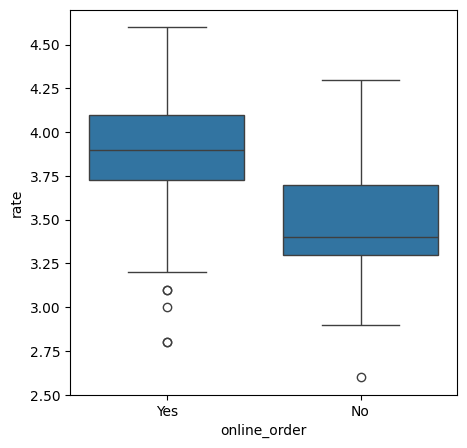

In [11]:
plt.figure(figsize = (5,5))
sns.boxplot(data =df , x = 'online_order', y = 'rate')
plt.show()

Analysis Result :- Offline rating has received lower rating compared to online rating

#### 6.Which types of restaurant received more offline oreder ?

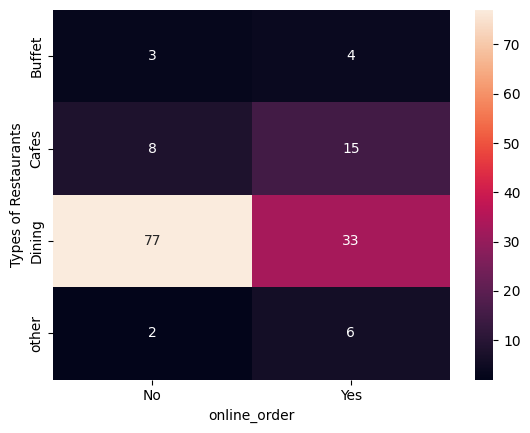

In [12]:
pivot_table = df.pivot_table(index = 'listed_in(type)',columns = 'online_order',aggfunc = 'size',fill_value = 0)
sns.heatmap(pivot_table,annot =True,fmt ='d')
plt.ylabel("Types of Restaurants")
plt.show()

Analysis Result :- Dinning restaurants have more offline orders